In [3]:
# import datascience 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from pathlib import Path

path_to_probability = Path("../data/evaluation/mean_metrics_single_fragment/")
assert path_to_probability.exists()

train_pdb_code = \
    {32: "2D0O",
    35: "1WQG",
    34: "1D1Q",
    33: "2I1S",
    20: "3WCQ",
    18: "1XER",
    27: "1LM8",
    9: "1JIH",
    11: "1BDF",
    7: "1RQP",
    29: "1V29",
    16: "1M7G",
    6: "1WE8",
    28: "1QSA",
    17: "1JDL",
    1: "1NR3",
    10: "1TKE",
    19: "1VYX",
    26: "1D4V",
    8: "1DJQ",
    21: "1EG3",
    38: "3SJ5",
    36: "1P90",
    31: "1JR3",
    30: "3BHP",
    37: "2PBL",
    39: "2CR7",
    24: "1CTF",
    23: "2GAN",
    4: "1A62",
    15: "1P0Z",
    3: "1K6K",
    12: "1UOU",
    40: "1LBU",
    2: "4KLI",
    13: "1CRU",
    5: "1EI1",
    14: "2PQ8",
    22: "2FZF",
    25: "1UYN"
     }

all_pdbs = {'1UYN', '1KIJ', '1ZZK', '1N71', '1QW2', '1IN0', '1IXR', '1LDJ', '3C8D', '1V29', '2FYW', '1GM5', '1KNQ', '2D0O', '1A62', '2YKZ', '1DOI', '2PBL', '4KLI', '2GR8', '2AHO', '4CDP', '1OEY', '1TED', '2I1S', '2JFG', '1O4U', '1ZBD', '1VF7', '2A19', '1FM0', '1MTZ', '2GX8', '1K6K', '2UUB', '1C0P', '2C42', '1WH9', '2V4J', '1DD3', '1OTH', '1NR3', '2FF4', '1UG7', '1ECS', '1T94', '1RQP', '1H21', '2C60', '1YT8', '2I5H', '2C9W', '1R8E', '1JX4', '1MKP', '4EAD', '1SP3', '1P90', '1JJF', '1EXT', '1HLV', '1T3W', '1SS4', '2IJQ', '1TQ1', '1ZBP', '3LGI', '1OXW', '1IJQ', '1INL', '1I3J', '3VDP', '1P9K', '1TLY', '1P0Z', '1WY6', '1OHE', '3SJ5', '1CRU', '1AGJ', '2WDQ', '1S16', '1F5M', '1N9L', '2CFU', '1NBW', '1YLE', '1TQY', '2CTE', '1EP3', '1ORN', '3ETJ', '1WQG', '2A9U', '1VIO', '2NYC', '1RZ3', '1FNN', '2GC6', '1NT0', '1C52', '1LM8', '1I78', '1F6V', '2CR7', '1K0R', '1ELW', '1GSI', '3L00', '1Q7E', '3BUL', '1T16', '1XB2', '2NR7', '1KHY', '1U94', '1TUA', '2D9R', '1GPR', '1W5S', '1D4V', '1WE8', '3A8G', '2G1L', '1J4W', '1JF8', '1D1Q', '1NMO', '2A6A', '1TIF', '2ASB', '1GHE', '1OX0', '1WUD', '1DJQ', '1FGJ', '1TKE', '1F44', '2HUE', '2CRB', '1Q2Z', '2GAN', '2V03', '1MLA', '3C8Y', '1FEU', '2Y3N', '1LBU', '1VKR', '1JHG', '1BDF', '2PQ8', '1QSA', '1WID', '1DM9', '1MO3', '1QJP', '2CSB', '1GKU', '1BDO', '1EI1', '1UL1', '1RYJ', '1UOU', '1O13', '1JDL', '1CZ4', '1A8P', '1VHS', '2QM8', '2IKB', '1JW9', '1WR0', '1OM2', '1LV7', '1X6H', '1EG3', '2AFF', '3WCQ', '1XP8', '1A9X', '2SCP', '1S05', '1IP9', '1VZ0', '1CI4', '1DCZ', '1E5Q', '1TL2', '1JIH', '2FZF', '1Z72', '2BCQ', '2BS2', '1I8O', '1KO7', '2AVU', '1WIH', '1JR3', '1P4W', '2NAC', '2O02', '1WMH', '1E2W', '2P6R', '1J5Y', '1M7G', '1HUX', '1TZY', '2VBU', '1EO1', '1CJX', '1XER', '1U7Q'}



# Using the middle position only

In [4]:
import typing as t
from scipy.stats import entropy
train_probabilities = {}
test_probabilities = {}

def process_filename(file_path: Path) -> t.Tuple[str, int, int, int, str]:
    name_parts = file_path.stem.split("_")
    metric_name, fragment_n = name_parts[0], int(name_parts[2])
    start_pos, end_pos = int(name_parts[4]), int(name_parts[6]) - 1
    pdb_code = name_parts[7]
    return metric_name, fragment_n, start_pos, end_pos, pdb_code

for pdb in all_pdbs:
    # Find all files related to this pdb
    all_paths = list(path_to_probability.glob(f"logprramrmsd_*{pdb}*.csv"))
    # Find all the start and end positions
    start_positions = []
    end_positions = []
    for file_path in all_paths:
        metric_name, fragment_n, start_pos, end_pos, pdb_code = process_filename(file_path)
        start_positions.append(start_pos)
        end_positions.append(end_pos)
    # Open the first path:
    data_array = pd.read_csv(all_paths[0]).to_numpy()
    # Find the signal at middle position:
    middle_positions = np.array(start_positions) + (np.array(end_positions) - np.array(start_positions)) // 2
    # Check that all the middle positions are in the data, if not skip:
    if not all(middle_positions < data_array.shape[0]):
        continue
    signal = data_array[middle_positions, :]
    # Select all other positions for noise
    noise = np.delete(data_array, middle_positions, axis=0)
    # Calculate entropy
    signal_entropy = entropy(signal, axis=1)
    signal_max = np.max(signal, axis=1)
    signal_median = np.median(signal, axis=1)
    noise_entropy = entropy(noise, axis=1)
    noise_max = np.max(noise, axis=1)
    noise_median = np.median(noise, axis=1)
    # Save the signal and noise
    results_dict = {"fragment_n": fragment_n, 
                                    "signal_entropy": signal_entropy, 
                                    "noise_entropy": noise_entropy,
                                    "signal_max": signal_max,
                                    "signal_median": signal_median,
                                    "noise_max": noise_max,
                                    "noise_median": noise_median,
                                    "probability": data_array}
    if pdb in train_pdb_code.values():
        train_probabilities[pdb] = results_dict
    else:
        test_probabilities[pdb] = results_dict

In [5]:
test_probabilities

{'2C42': {'fragment_n': 18,
  'signal_entropy': array([3.67566701, 3.67483332]),
  'noise_entropy': array([3.67572759, 3.67572759, 3.67572759, ..., 3.67733552, 3.67733552,
         3.67733552]),
  'signal_max': array([0.042841  , 0.04321925]),
  'signal_median': array([0.0247006 , 0.02459557]),
  'noise_max': array([0.03367695, 0.03367695, 0.03367695, ..., 0.03410726, 0.03410726,
         0.03410726]),
  'noise_median': array([0.02352026, 0.02352026, 0.02352026, ..., 0.02467816, 0.02467816,
         0.02467816]),
  'probability': array([[0.02255941, 0.02629198, 0.02171244, ..., 0.02161677, 0.02364535,
          0.032055  ],
         [0.02255941, 0.02629198, 0.02171244, ..., 0.02161677, 0.02364535,
          0.032055  ],
         [0.02255941, 0.02629198, 0.02171244, ..., 0.02161677, 0.02364535,
          0.032055  ],
         ...,
         [0.02420777, 0.02701136, 0.024292  , ..., 0.02785033, 0.02622351,
          0.02999915],
         [0.02420777, 0.02701136, 0.024292  , ..., 0.0278503

In [6]:
# For test data
test_entropy_signal = np.concatenate([test_probabilities[pdb]["signal_entropy"]
                                      for
                                      pdb in test_probabilities])
test_entropy_noise = np.concatenate([test_probabilities[pdb]["noise_entropy"] for 
                                     pdb in test_probabilities])

# For train data
train_entropy_signal = np.concatenate([train_probabilities[pdb]["signal_entropy"] for pdb in train_probabilities])
train_entropy_noise = np.concatenate([train_probabilities[pdb]["noise_entropy"] for pdb in train_probabilities])

# Extract max and median values
test_max_signal = np.concatenate([test_probabilities[pdb]["signal_max"] for pdb in test_probabilities])
test_max_noise = np.concatenate([test_probabilities[pdb]["noise_max"] for pdb in test_probabilities])
test_median_signal = np.concatenate([test_probabilities[pdb]["signal_median"] for pdb in test_probabilities])
test_median_noise = np.concatenate([test_probabilities[pdb]["noise_median"] for pdb in test_probabilities])
# and train
train_max_signal = np.concatenate([train_probabilities[pdb]["signal_max"] for pdb in train_probabilities])
train_max_noise = np.concatenate([train_probabilities[pdb]["noise_max"] for pdb in train_probabilities])
train_median_signal = np.concatenate([train_probabilities[pdb]["signal_median"] for pdb in train_probabilities])
train_median_noise = np.concatenate([train_probabilities[pdb]["noise_median"] for pdb in train_probabilities])



In [7]:
def plot_data(test_signal, test_noise, train_signal, train_noise, 
        xlabel, signal_label='Signal', noise_label='Noise'):
    # Plotting merged histograms for signal and noise
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Test data histogram
    sns.histplot(test_signal, bins=20, kde=True, ax=ax[0], color='blue', stat='density', label=signal_label)
    sns.histplot(test_noise, bins=20, kde=True, ax=ax[0], color='red', stat='density', label=noise_label)
    ax[0].set_title('Histogram of Test Data')
    ax[0].set_xlabel(f'{xlabel} Values')
    ax[0].set_ylabel('Density')
    ax[0].legend()

    # Train data histogram
    sns.histplot(train_signal, bins=20, kde=True, ax=ax[1], color='blue', stat='density', label=signal_label)
    sns.histplot(train_noise, bins=20, kde=True, ax=ax[1], color='red', stat='density', label=noise_label)
    ax[1].set_title('Histogram of Train Data')
    ax[1].set_xlabel(f'{xlabel} Values')
    ax[1].set_ylabel('Density')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    # Plotting boxplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(data=[test_signal, train_signal], ax=ax[0])
    sns.boxplot(data=[test_noise, train_noise], ax=ax[1])
    ax[0].set_xticklabels(['Test ' + signal_label, 'Train ' + signal_label])
    ax[0].set_title('Boxplot of ' + signal_label + f' {xlabel}')
    ax[1].set_xticklabels(['Test ' + noise_label, 'Train ' + noise_label])
    ax[1].set_title('Boxplot of ' + noise_label + f' {xlabel}')
    ax[0].set_ylabel(f'{xlabel} Values')
    ax[1].set_ylabel(f'{xlabel} Values')

    # Ensuring both boxplots have the same y-axis scale
    y_min = min(ax[0].get_ylim()[0], ax[1].get_ylim()[0])
    y_max = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
    ax[0].set_ylim(y_min, y_max)
    ax[1].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

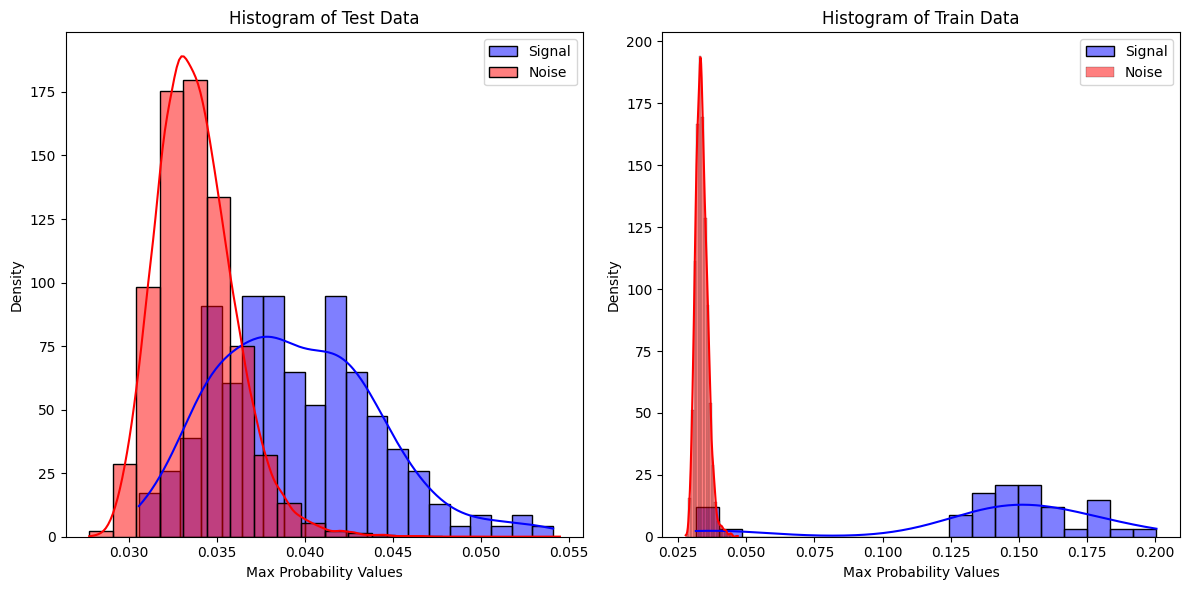

/var/folders/s6/nfbpxj3172954y6cm4910knw0000gn/T/ipykernel_28973/2008614915.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Test ' + signal_label, 'Train ' + signal_label])
/var/folders/s6/nfbpxj3172954y6cm4910knw0000gn/T/ipykernel_28973/2008614915.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['Test ' + noise_label, 'Train ' + noise_label])


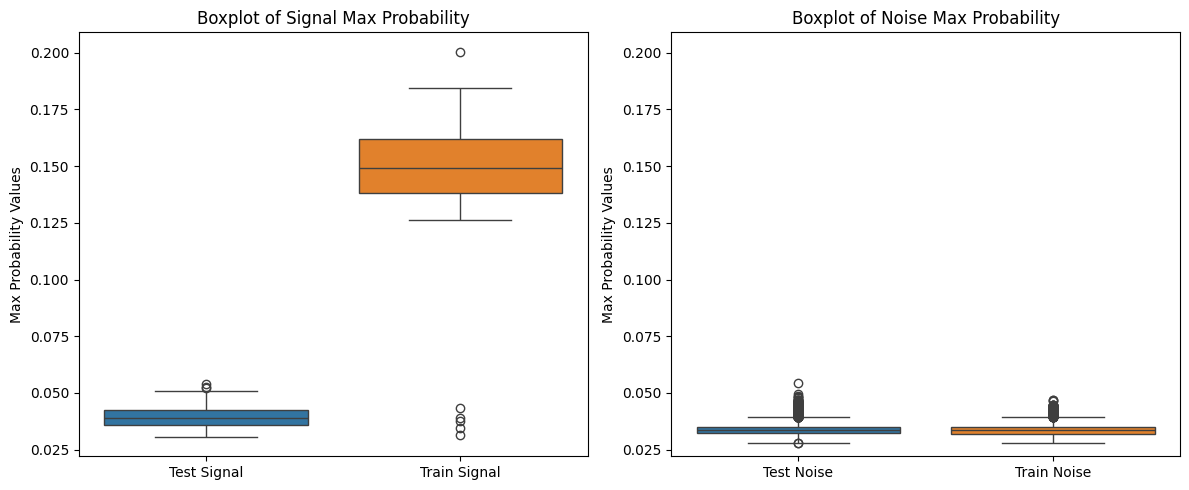

In [8]:
plot_data(test_max_signal, test_max_noise, train_max_signal, 
          train_max_noise, 'Max Probability')

# Investigating Max

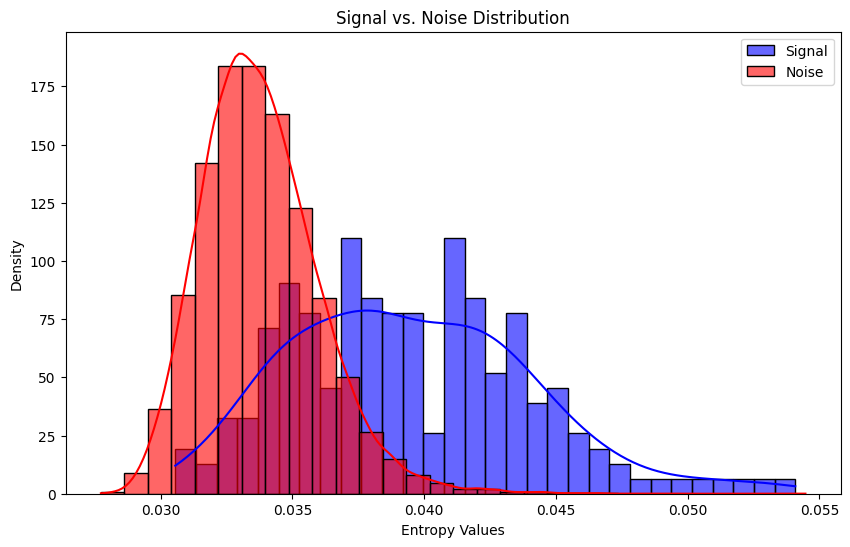

In [9]:
def plot_signal_noise_distributions(signal, noise):
    plt.figure(figsize=(10, 6))
    sns.histplot(signal, color='blue', label='Signal', kde=True, stat='density', bins=30, alpha=0.6)
    sns.histplot(noise, color='red', label='Noise', kde=True, stat='density', bins=30, alpha=0.6)
    plt.legend()
    plt.title('Signal vs. Noise Distribution')
    plt.xlabel('Entropy Values')
    plt.ylabel('Density')
    plt.show()

# Assuming test_max_signal and test_max_noise are your data arrays
plot_signal_noise_distributions(test_max_signal, test_max_noise)

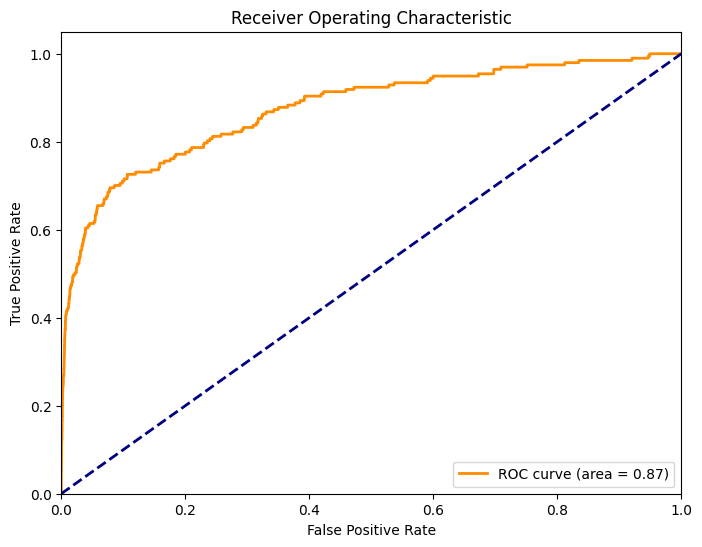

In [14]:
def plot_roc_curve(signal, noise):
    # Prepare the data
    # Labels: 1 for signal, 0 for noise
    labels = np.concatenate([np.ones(len(signal)), np.zeros(len(noise))])
    scores = np.concatenate([signal, noise])
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(test_max_signal, test_max_noise)


In [13]:
from sklearn.metrics import roc_curve, auc

def find_threshold_for_tpr(tpr, fpr, thresholds, desired_tpr=0.85):
    # Find the first index where the true positive rate is greater than or equal to the desired TPR
    idx = np.where(tpr >= desired_tpr)[0][0]  # Get the first such index
    return thresholds[idx], tpr[idx], fpr[idx]

# Example labels: 1 for signal, 0 for noise
labels = np.concatenate([np.ones(test_max_signal.shape[0]), np.zeros(test_max_noise.shape[0])])
scores = np.concatenate([test_max_signal, test_max_noise])

fpr, tpr, thresholds = roc_curve(labels, scores)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold by ROC:", optimal_threshold)
print("True Positive Rate at Optimal Threshold:", tpr[optimal_idx] )
print("False Positive Rate at Optimal Threshold:", fpr[optimal_idx] )



# Find the threshold for a TPR of 0.85
threshold_85, tpr_85, fpr_85 = find_threshold_for_tpr(tpr, fpr, thresholds, desired_tpr=0.85)
print("Threshold for TPR of 0.85:", threshold_85)
print("True Positive Rate at Threshold for TPR of 0.85:", tpr_85)
print("False Positive Rate at Threshold for TPR of 0.85:", fpr_85)

# Find the threshold for a TPR of 0.90
threshold_90, tpr_90, fpr_90 = find_threshold_for_tpr(tpr, fpr, thresholds, desired_tpr=0.90)
print("Threshold for TPR of 0.90:", threshold_90)
print("True Positive Rate at Threshold for TPR of 0.90:", tpr_90)
print("False Positive Rate at Threshold for TPR of 0.90:", fpr_90)

# Find the threshold for a TPR of 0.95
threshold_95, tpr_95, fpr_95 = find_threshold_for_tpr(tpr, fpr, thresholds, desired_tpr=0.95)
print("Threshold for TPR of 0.95:", threshold_95)
print("True Positive Rate at Threshold for TPR of 0.95:", tpr_95)
print("False Positive Rate at Threshold for TPR of 0.95:", fpr_95)


Optimal Threshold by ROC: 0.03652618957076424
True Positive Rate at Optimal Threshold: 0.7258883248730964
False Positive Rate at Optimal Threshold: 0.10643497757847534
Threshold for TPR of 0.85: 0.034630304805826705
True Positive Rate at Threshold for TPR of 0.85: 0.8527918781725888
False Positive Rate at Threshold for TPR of 0.85: 0.3178251121076233
Threshold for TPR of 0.90: 0.03417436227515402
True Positive Rate at Threshold for TPR of 0.90: 0.9035532994923858
False Positive Rate at Threshold for TPR of 0.90: 0.39230941704035877
Threshold for TPR of 0.95: 0.032662020613613583
True Positive Rate at Threshold for TPR of 0.95: 0.9543147208121827
False Positive Rate at Threshold for TPR of 0.95: 0.6727354260089686


In [89]:
test_probabilities['1TQ1']['probability']

array([[0.0245408 , 0.03109931, 0.01930569, ..., 0.02125623, 0.02313269,
        0.03029012],
       [0.0245408 , 0.03109931, 0.01930569, ..., 0.02125623, 0.02313269,
        0.03029012],
       [0.0245408 , 0.03109931, 0.01930569, ..., 0.02125623, 0.02313269,
        0.03029012],
       ...,
       [0.0216267 , 0.024408  , 0.02494423, ..., 0.02529673, 0.02464331,
        0.027265  ],
       [0.0216267 , 0.024408  , 0.02494423, ..., 0.02529673, 0.02464331,
        0.027265  ],
       [0.0216267 , 0.024408  , 0.02494423, ..., 0.02529673, 0.02464331,
        0.027265  ]])

# Investigating Median

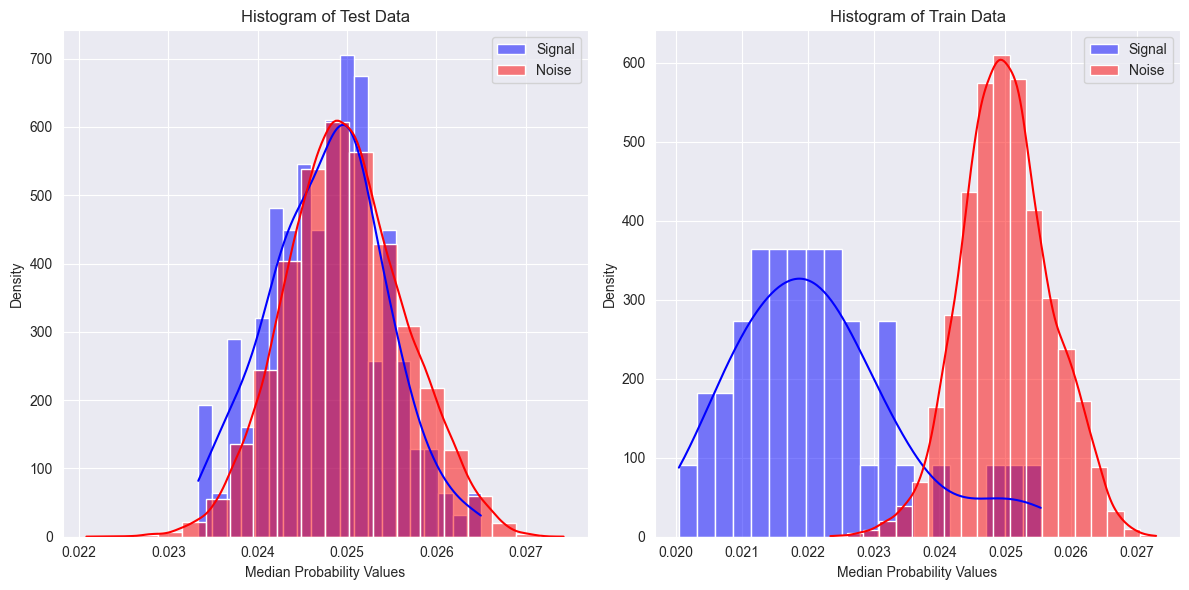

/var/folders/s6/nfbpxj3172954y6cm4910knw0000gn/T/ipykernel_61506/1733367199.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Test ' + signal_label, 'Train ' + signal_label])
/var/folders/s6/nfbpxj3172954y6cm4910knw0000gn/T/ipykernel_61506/1733367199.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['Test ' + noise_label, 'Train ' + noise_label])


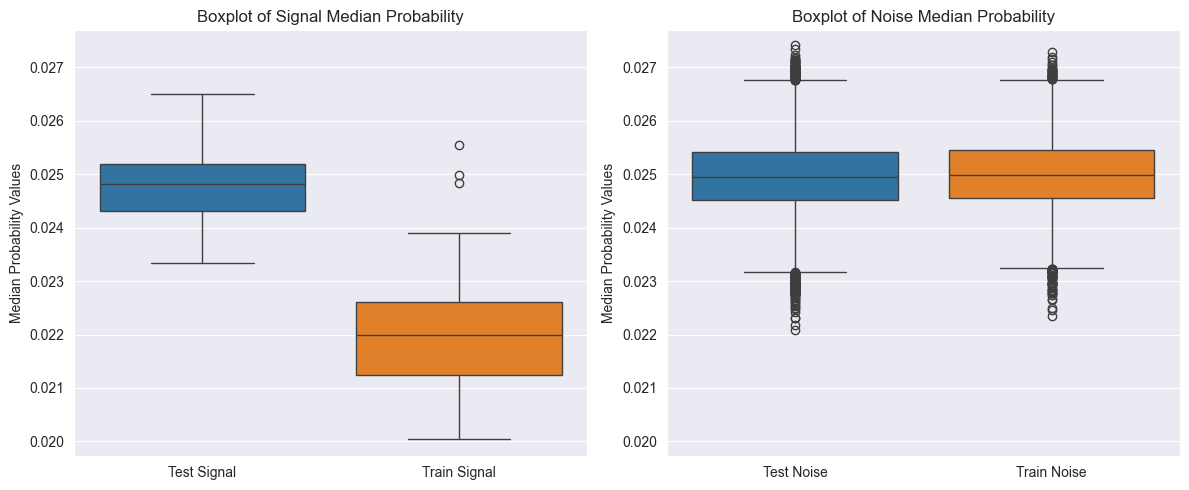

In [66]:
plot_data(test_median_signal, test_median_noise, train_median_signal, 
          train_median_noise, 'Median Probability')

# Investigating Entropy

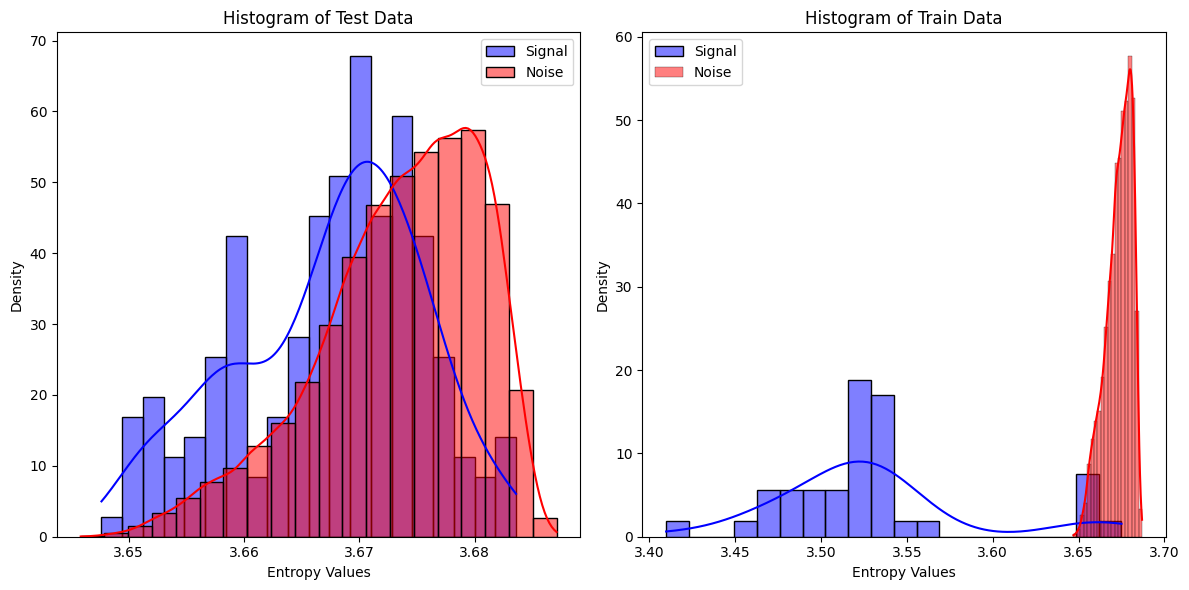

/var/folders/s6/nfbpxj3172954y6cm4910knw0000gn/T/ipykernel_28973/2008614915.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Test ' + signal_label, 'Train ' + signal_label])
/var/folders/s6/nfbpxj3172954y6cm4910knw0000gn/T/ipykernel_28973/2008614915.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['Test ' + noise_label, 'Train ' + noise_label])


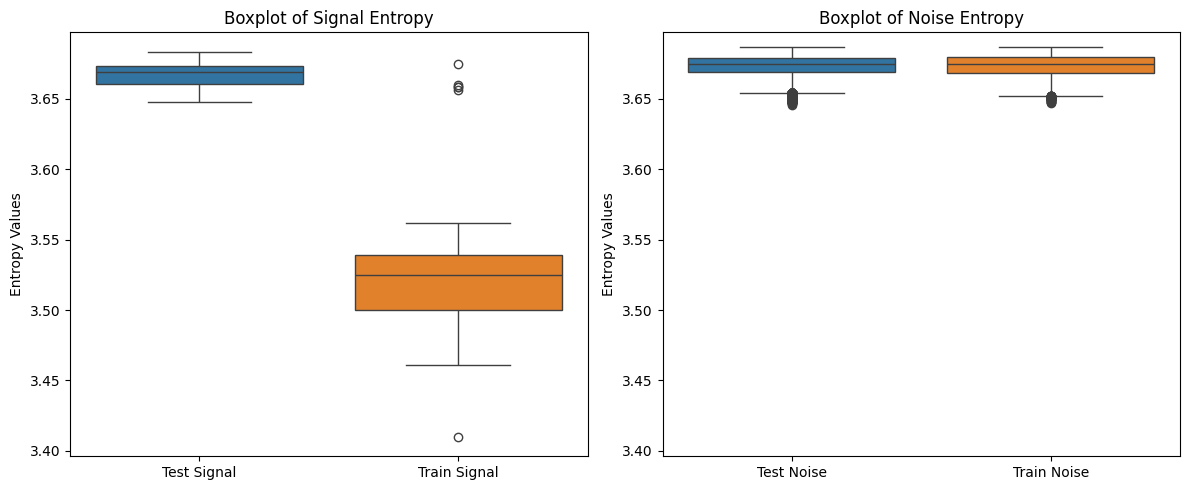

In [15]:
plot_data(test_entropy_signal, test_entropy_noise, train_entropy_signal, 
          train_entropy_noise, 'Entropy')

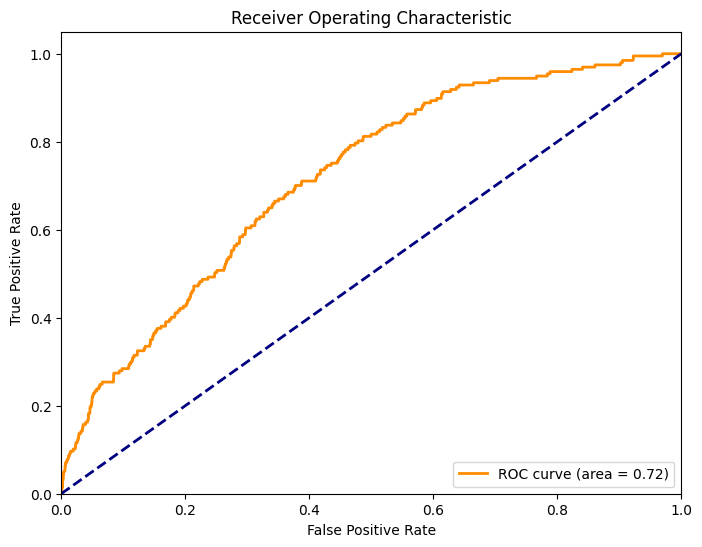

In [16]:
def plot_roc_curve(signal, noise):
    # Prepare the data
    # Labels: 1 for signal, 0 for noise
    labels = np.concatenate([np.ones(len(signal)), np.zeros(len(noise))])
    scores = np.concatenate([signal, noise])
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(1/test_entropy_signal, 1/test_entropy_noise)


# Investigating best metric with ROC curve

In [17]:
import numpy as np
from sklearn.metrics import roc_curve, auc

def find_threshold_for_tpr(tpr, fpr, thresholds, desired_tpr=0.85):
    # Find the first index where the true positive rate is greater than or equal to the desired TPR
    idx = np.where(tpr >= desired_tpr)[0][0]  # Get the first such index
    return thresholds[idx], tpr[idx], fpr[idx]

def evaluate_model_performance(signal, noise):
    # Prepare the data
    labels = np.concatenate([np.ones(len(signal)), np.zeros(len(noise))])
    scores = np.concatenate([signal, noise])

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    # Find the optimal threshold
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    print("Optimal Threshold by ROC:", optimal_threshold)
    print("True Positive Rate at Optimal Threshold:", tpr[optimal_idx])
    print("False Positive Rate at Optimal Threshold:", fpr[optimal_idx])

    # Find the threshold for a TPR of 0.85
    threshold_85, tpr_85, fpr_85 = find_threshold_for_tpr(tpr, fpr, thresholds, desired_tpr=0.85)
    print("Threshold for TPR of 0.85:", threshold_85)
    print("True Positive Rate at Threshold for TPR of 0.85:", tpr_85)
    print("False Positive Rate at Threshold for TPR of 0.85:", fpr_85)

    # Find the threshold for a TPR of 0.90
    threshold_90, tpr_90, fpr_90 = find_threshold_for_tpr(tpr, fpr, thresholds, desired_tpr=0.90)
    print("Threshold for TPR of 0.90:", threshold_90)
    print("True Positive Rate at Threshold for TPR of 0.90:", tpr_90)
    print("False Positive Rate at Threshold for TPR of 0.90:", fpr_90)

    # Find the threshold for a TPR of 0.95
    threshold_95, tpr_95, fpr_95 = find_threshold_for_tpr(tpr, fpr, thresholds, desired_tpr=0.95)
    print("Threshold for TPR of 0.95:", threshold_95)
    print("True Positive Rate at Threshold for TPR of 0.95:", tpr_95)
    print("False Positive Rate at Threshold for TPR of 0.95:", fpr_95)



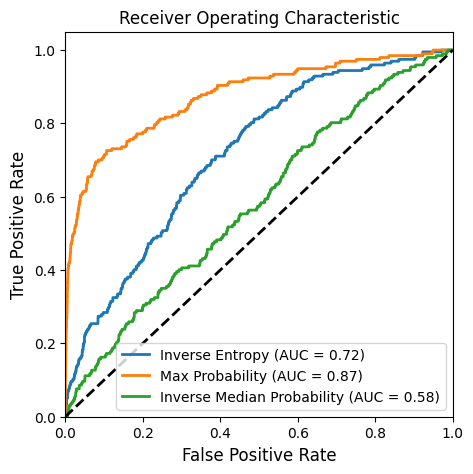

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_multiple_roc_curves(signals, noises, labels):
    # Check if input lists are consistent
    if not (len(signals) == len(noises) == len(labels)):
        raise ValueError("Lists of signals, noises, and labels must be of the same length")

    plt.figure(figsize=(5, 5))

    # Iterate over each model's signals and noises
    for signal, noise, label in zip(signals, noises, labels):
        # Prepare the data
        labels_combined = np.concatenate([np.ones(len(signal)), np.zeros(len(noise))])
        scores_combined = np.concatenate([signal, noise])

        # Calculate ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(labels_combined, scores_combined)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for this model
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

    # Plot chance line
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic', fontsize=12)
    plt.legend(loc="lower right")
    plt.savefig('ROC.pdf')

# Example usage:
signals = [1/test_entropy_signal, test_max_signal, 1/test_median_signal]
noises = [1/test_entropy_noise, test_max_noise, 1/test_median_noise]
labels = ['Inverse Entropy','Max Probability', 'Inverse Median Probability']

plot_multiple_roc_curves(signals, noises, labels)

In [19]:
evaluate_model_performance(1/test_entropy_signal, 1/test_entropy_noise)

Optimal Threshold by ROC: 0.2721902815005981
True Positive Rate at Optimal Threshold: 0.7918781725888325
False Positive Rate at Optimal Threshold: 0.46603139013452916
Threshold for TPR of 0.85: 0.272067044378336
True Positive Rate at Threshold for TPR of 0.85: 0.8527918781725888
False Positive Rate at Threshold for TPR of 0.85: 0.5515695067264574
Threshold for TPR of 0.90: 0.2719848247394283
True Positive Rate at Threshold for TPR of 0.90: 0.9035532994923858
False Positive Rate at Threshold for TPR of 0.90: 0.6130493273542601
Threshold for TPR of 0.95: 0.2717644678174031
True Positive Rate at Threshold for TPR of 0.95: 0.9543147208121827
False Positive Rate at Threshold for TPR of 0.95: 0.7838116591928251


In [128]:
evaluate_model_performance(test_max_signal, test_max_noise)

Optimal Threshold by ROC: 0.03652618957076424
True Positive Rate at Optimal Threshold: 0.7258883248730964
False Positive Rate at Optimal Threshold: 0.10643497757847534
Threshold for TPR of 0.85: 0.034630304805826705
True Positive Rate at Threshold for TPR of 0.85: 0.8527918781725888
False Positive Rate at Threshold for TPR of 0.85: 0.3178251121076233
Threshold for TPR of 0.90: 0.03417436227515402
True Positive Rate at Threshold for TPR of 0.90: 0.9035532994923858
False Positive Rate at Threshold for TPR of 0.90: 0.39230941704035877
Threshold for TPR of 0.95: 0.032662020613613583
True Positive Rate at Threshold for TPR of 0.95: 0.9543147208121827
False Positive Rate at Threshold for TPR of 0.95: 0.6727354260089686


In [129]:
evaluate_model_performance(1/test_median_signal, 1/test_median_noise)

Optimal Threshold by ROC: 39.8061881188795
True Positive Rate at Optimal Threshold: 0.7258883248730964
False Positive Rate at Optimal Threshold: 0.5994170403587444
Threshold for TPR of 0.85: 39.32125858274231
True Positive Rate at Threshold for TPR of 0.85: 0.8527918781725888
False Positive Rate at Threshold for TPR of 0.85: 0.7552466367713004
Threshold for TPR of 0.90: 39.09191562516131
True Positive Rate at Threshold for TPR of 0.90: 0.9035532994923858
False Positive Rate at Threshold for TPR of 0.90: 0.8131165919282511
Threshold for TPR of 0.95: 38.696484251900344
True Positive Rate at Threshold for TPR of 0.95: 0.9543147208121827
False Positive Rate at Threshold for TPR of 0.95: 0.8912331838565022


# Using the full Fragment length

In [51]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

train_probabilities = {}
test_probabilities = {}

for pdb in all_pdbs:
    # Find all files related to this pdb
    all_paths = list(path_to_probability.glob(f"logprramrmsd_*{pdb}*.csv"))
    if not all_paths:
        continue  # Skip this pdb if no files are found

    # Find all the start and end positions
    start_positions = []
    end_positions = []
    for file_path in all_paths:
        metric_name, fragment_n, start_pos, end_pos, pdb_code = process_filename(file_path)
        start_positions.append(start_pos)
        end_positions.append(end_pos)

    # Open the first path:
    data_array = pd.read_csv(all_paths[0]).to_numpy()

    # Slice the data for fragment start and end positions and concatenate all slices
    slices = [data_array[start:end + 1] for start, end in zip(start_positions, end_positions)]
    concatenated_slices = np.concatenate(slices, axis=0)  # Combining all slices into one array

    # Extract signal and noise
    # Assuming we treat all the concatenated slice data as 'signal'
    signal = concatenated_slices
    # And all positions not in any slice as 'noise'
    all_indices = set(range(data_array.shape[0]))
    slice_indices = {idx for start, end in zip(start_positions, end_positions) for idx in range(start, end + 1)}
    noise_indices = list(all_indices - slice_indices)
    noise = data_array[noise_indices, :] if noise_indices else np.array([])  # Handling empty noise

    # Calculate entropy
    signal_entropy = entropy(signal, axis=1)
    noise_entropy = entropy(noise, axis=1)

    # Save the signal and noise
    if pdb in train_pdb_code.values():
        train_probabilities[pdb] = {"fragment_n": fragment_n, "signal": signal_entropy, "noise": noise_entropy}
    else:
        test_probabilities[pdb] = {"fragment_n": fragment_n, "signal": signal_entropy, "noise": noise_entropy}


In [52]:
test_probabilities

{'1TQ1': {'fragment_n': 34,
  'signal': array([3.66951922, 3.66993285, 3.6710684 , 3.66871346, 3.67010775,
         3.67034639, 3.67179045, 3.67048969, 3.67165755, 3.67149929,
         3.67170632, 3.66723301, 3.67200781, 3.67568173, 3.67218204,
         3.67271029, 3.67793367, 3.67853655, 3.67933517, 3.67797751,
         3.67496949, 3.67158302, 3.66819889]),
  'noise': array([3.6765375 , 3.6765375 , 3.6765375 , 3.6765375 , 3.67669664,
         3.67611564, 3.67508443, 3.6710075 , 3.67152617, 3.6675228 ,
         3.66936258, 3.67127012, 3.67437555, 3.67629613, 3.67783093,
         3.67944826, 3.682138  , 3.68231918, 3.68090501, 3.67852313,
         3.67154446, 3.66698385, 3.66402822, 3.66403801, 3.66558303,
         3.6669212 , 3.67041514, 3.67510741, 3.67798878, 3.67881812,
         3.68030484, 3.68076368, 3.68049396, 3.67884374, 3.6793854 ,
         3.67919776, 3.67777268, 3.6797481 , 3.67693406, 3.67766814,
         3.67889462, 3.6760635 , 3.67960855, 3.67823246, 3.68044607,
         

In [53]:
# For test data
test_entropy_signal = np.concatenate([test_probabilities[pdb]["signal"] for pdb in test_probabilities])
test_entropy_noise = np.concatenate([test_probabilities[pdb]["noise"] for pdb in test_probabilities])

# For train data
train_entropy_signal = np.concatenate([train_probabilities[pdb]["signal"] for pdb in train_probabilities])
train_entropy_noise = np.concatenate([train_probabilities[pdb]["noise"] for pdb in train_probabilities])

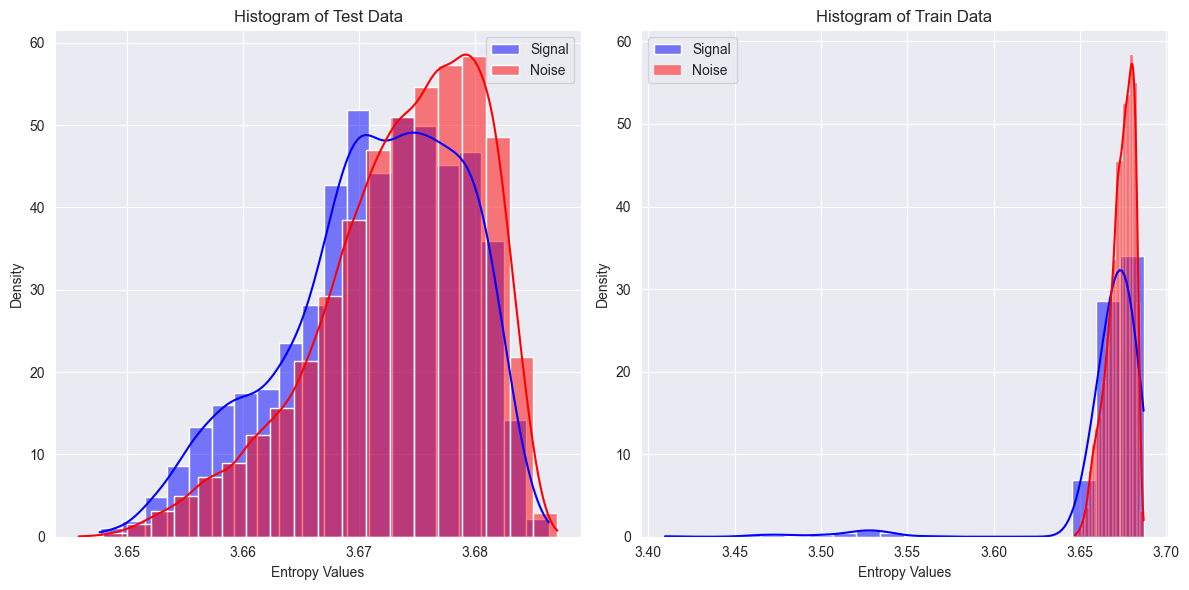

/var/folders/s6/nfbpxj3172954y6cm4910knw0000gn/T/ipykernel_61506/2299813356.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Test Signal', 'Train Signal'])
/var/folders/s6/nfbpxj3172954y6cm4910knw0000gn/T/ipykernel_61506/2299813356.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['Test Noise', 'Train Noise'])


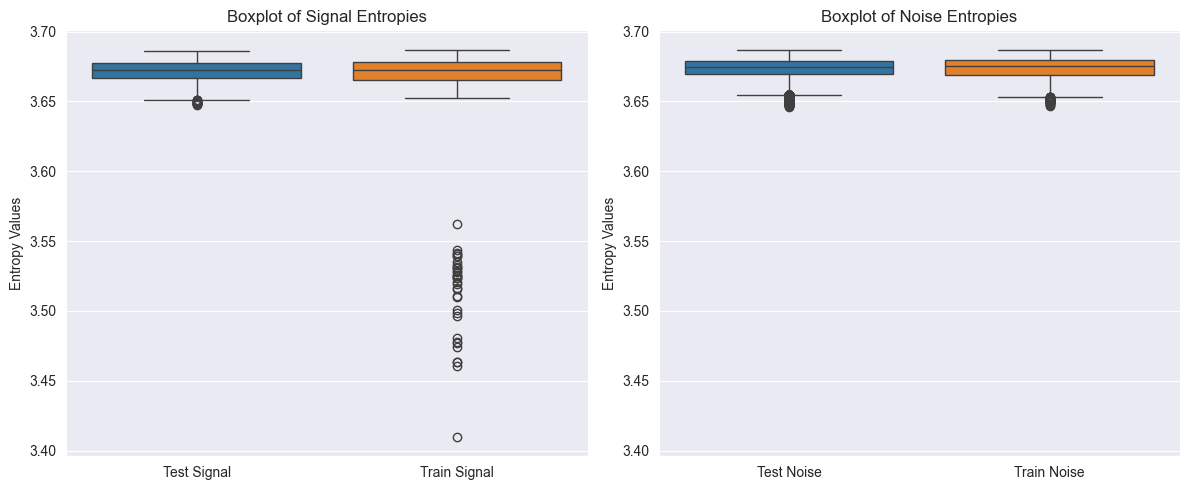

In [54]:
# Plotting merged histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Test data histogram
sns.histplot(test_entropy_signal, bins=20, kde=True, ax=ax[0], color='blue', stat='density', label='Signal')
sns.histplot(test_entropy_noise, bins=20, kde=True, ax=ax[0], color='red', stat='density', label='Noise')
ax[0].set_title('Histogram of Test Data')
ax[0].set_xlabel('Entropy Values')
ax[0].set_ylabel('Density')
ax[0].legend()

# Train data histogram
sns.histplot(train_entropy_signal, bins=20, kde=True, ax=ax[1], color='blue', stat='density', label='Signal')
sns.histplot(train_entropy_noise, bins=20, kde=True, ax=ax[1], color='red', stat='density', label='Noise')
ax[1].set_title('Histogram of Train Data')
ax[1].set_xlabel('Entropy Values')
ax[1].set_ylabel('Density')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting boxplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=[test_entropy_signal, train_entropy_signal], ax=ax[0])
sns.boxplot(data=[test_entropy_noise, train_entropy_noise], ax=ax[1])
ax[0].set_xticklabels(['Test Signal', 'Train Signal'])
ax[0].set_title('Boxplot of Signal Entropies')
ax[1].set_xticklabels(['Test Noise', 'Train Noise'])
ax[1].set_title('Boxplot of Noise Entropies')
ax[0].set_ylabel('Entropy Values')
ax[1].set_ylabel('Entropy Values')

# Ensuring both boxplots have the same y-axis scale
y_min = min(ax[0].get_ylim()[0], ax[1].get_ylim()[0])
y_max = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
ax[0].set_ylim(y_min, y_max)
ax[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

# Classification Logic

In [113]:
def assign_fragments_adjust_on_overlap(probabilities, fragment_lengths, threshold, allowed_overlap):
    n, num_classes = probabilities.shape
    max_probs = np.max(probabilities, axis=1)
    max_classes = np.argmax(probabilities, axis=1)

    # Apply threshold and sort positions by highest probability
    valid_indices = np.where(max_probs >= threshold)[0]
    sorted_indices = valid_indices[np.argsort(-max_probs[valid_indices])]

    assigned_fragments = np.zeros(n, dtype=int)  # 0 indicates unassigned

    for pos in sorted_indices:
        frag_class = max_classes[pos]
        frag_length = fragment_lengths[frag_class]
        start = max(0, pos - frag_length // 2)
        end = min(n - 1, pos + frag_length // 2)

        # Check for overlapping
        if np.any(assigned_fragments[start:end + 1] > 0):
            # Check if allowable truncation at both ends is possible
            # Adjust start to avoid overlap if possible
            if assigned_fragments[start] != 0:  # Start is overlapping
                new_start = start
                while new_start <= end and assigned_fragments[new_start] != 0:
                    new_start += 1
                if new_start - start <= allowed_overlap:
                    start = new_start
                else:
                    continue  # Skip if allowed truncation is exceeded

            # Adjust end to avoid overlap if possible
            if assigned_fragments[end] != 0:  # End is overlapping
                new_end = end
                while new_end >= start and assigned_fragments[new_end] != 0:
                    new_end -= 1
                if end - new_end <= allowed_overlap:
                    end = new_end
                else:
                    continue  # Skip if allowed truncation is exceeded

        # Assign the fragment if adjustments are within allowed limits
        if end >= start:  # Ensure there's still a valid fragment
            assigned_fragments[start:end + 1] = frag_class + 1

    return assigned_fragments

In [114]:
test_probabilities['1TQ1']['probability']

array([[0.0245408 , 0.03109931, 0.01930569, ..., 0.02125623, 0.02313269,
        0.03029012],
       [0.0245408 , 0.03109931, 0.01930569, ..., 0.02125623, 0.02313269,
        0.03029012],
       [0.0245408 , 0.03109931, 0.01930569, ..., 0.02125623, 0.02313269,
        0.03029012],
       ...,
       [0.0216267 , 0.024408  , 0.02494423, ..., 0.02529673, 0.02464331,
        0.027265  ],
       [0.0216267 , 0.024408  , 0.02494423, ..., 0.02529673, 0.02464331,
        0.027265  ],
       [0.0216267 , 0.024408  , 0.02494423, ..., 0.02529673, 0.02464331,
        0.027265  ]])

In [115]:
from src.fragments.classifier import StructureFragmentClassifier
fragment_path = "../data/fragments/"
classifier = StructureFragmentClassifier(
    Path(fragment_path),
    difference_type="angle",
    difference_name="rms",
    n_processes=10,
    step_size=1,
    fix_convolution_edges=True,
    probabilistic_classification=False,
    classification_threshold=1e-20, zscore_fn="exponential_decay",
)
# Calculate the number of instances for each fragment
fragment_counts = {}
for k, v in classifier.fragment_dict.items():
    fragment_counts[k] = v.fragment_length

In [120]:
allowed_overlap = 1  # Allow 1 position of overlap at both ends
threshold = optimal_threshold
assigned_fragments = (assign_fragments_adjust_on_overlap
                      (test_probabilities['1TQ1']['probability'],fragment_counts, threshold, allowed_overlap))


In [121]:
assigned_fragments

array([37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
       37, 37, 37, 37, 37, 37, 37, 37, 37,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17,  0,  0,  0,  0,  0,  0,  0, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30,  0,  0,  0,  0,  0,  0,  0,  0])

In [104]:
fragment_counts[37]

15

In [110]:
test_probabilities.keys()

dict_keys(['1TQ1', '2VBU', '3ETJ', '1F5M', '1I78', '1O13', '2QM8', '1ZBD', '1IN0', '1BDO', '2G1L', '2C42', '2FYW', '2AVU', '1GPR', '2V4J', '1TL2', '2GC6', '2WDQ', '1I8O', '1TLY', '1IP9', '1T3W', '3C8Y', '2CRB', '1INL', '1C0P', '1RYJ', '2A6A', '2A19', '3LGI', '1VF7', '2IJQ', '1S05', '1DM9', '1GM5', '1ZBP', '2P6R', '1K0R', '1NBW', '1KHY', '1F6V', '1GKU', '1WY6', '1KIJ', '1A9X', '2NYC', '2ASB', '1AGJ', '1MTZ', '1TUA', '1JF8', '1WUD', '1OTH', '1OEY', '1UG7', '2NAC', '2SCP', '1U94', '1FEU', '1IXR', '1JX4', '1OM2', '1CZ4', '1JJF', '1WMH', '1NMO', '1IJQ', '1DCZ', '1VHS', '1LV7', '1ZZK', '2GR8', '2O02', '1E5Q', '1GSI', '2AFF', '1FM0', '2BS2', '1EO1', '1WID', '1YT8', '1QJP', '1X6H', '1U7Q', '1DOI', '3BUL', '1TQY', '1EP3', '1VIO', '1S16', '1FNN', '2C60', '1Z72', '1LDJ', '1TZY', '1JHG', '1HLV', '1DD3', '1WH9', '1ELW', '1O4U', '2V03', '1CI4', '1OX0', '1J5Y', '2AHO', '1J4W', '2A9U', '2IKB', '2D9R', '1MO3', '1NT0', '1VKR', '1ORN', '2FF4', '1T16', '2YKZ', '1I3J', '1XP8', '1UL1', '1R8E', '4CDP', '3C8D

In [134]:
sorted_dict = dict(sorted(fragment_counts.items()))

In [135]:
sorted_dict

{1: 20,
 2: 22,
 3: 30,
 4: 20,
 5: 24,
 6: 26,
 7: 23,
 8: 30,
 9: 26,
 10: 22,
 11: 26,
 12: 18,
 13: 37,
 14: 23,
 15: 15,
 16: 23,
 17: 9,
 18: 15,
 19: 31,
 20: 15,
 21: 20,
 22: 35,
 23: 18,
 24: 25,
 25: 19,
 26: 18,
 27: 32,
 28: 32,
 29: 27,
 30: 31,
 31: 24,
 32: 30,
 33: 23,
 34: 25,
 35: 29,
 36: 26,
 37: 15,
 38: 30,
 39: 33,
 40: 19}